In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        pass
#         print(os.path.join(dirname, filename))
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd       
import os 
import math 
import numpy as np
import matplotlib.pyplot as plt  
import IPython.display as ipd  # To play sound in the notebook
import librosa
import librosa.display
from tqdm import *
from keras.callbacks import (EarlyStopping, LearningRateScheduler,
                             ModelCheckpoint, TensorBoard, ReduceLROnPlateau)
!apt install -y ffmpeg
# os.chdir("/kaggle/input/freesound-audio-tagging/audio_train")
#os.getcwd()
os.chdir("/kaggle/input/speech-accent-archive/recordings")
import warnings
warnings.filterwarnings('ignore')

OUTPUT_DIR = '/kaggle/working/'





ffmpeg is already the newest version (7:4.2.4-1ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 52 not upgraded.


In [3]:
# Play female from Kentucky
fname_f = 'recordings/' + 'english385.mp3'   
ipd.Audio(fname_f)

In [4]:
filename = '/kaggle/input/common-voice/cv-other-test/cv-other-test/sample-001204.mp3'
ipd.Audio(filename)

In [5]:
# Play male from Kentucky
fname_m = 'recordings/' + 'english381.mp3'
ipd.Audio(fname_m)

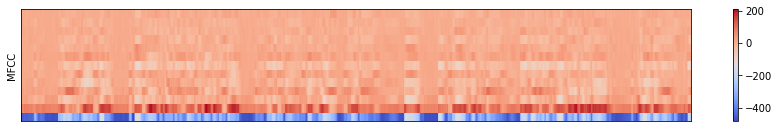

In [6]:
# MFCC for female 
SAMPLE_RATE = 22050
fname_f = 'recordings/' + 'english385.mp3'

y, sr = librosa.load(fname_f, sr=SAMPLE_RATE, duration = 20)# Chop audio at 10 secs...
mfcc = librosa.feature.mfcc(y=y, sr=SAMPLE_RATE, n_mfcc = 13)# 10 MFCC components

plt.figure(figsize=(15, 7))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc)
plt.ylabel('MFCC')
plt.colorbar()

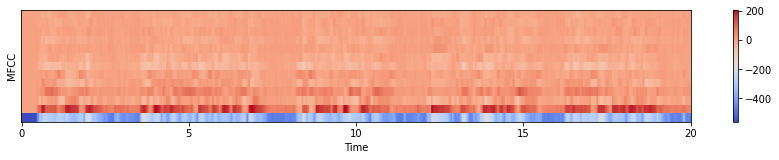

In [7]:
# MFCC for male  
SAMPLE_RATE = 22050
fname_m = 'recordings/' + 'english381.mp3'  
y, sr = librosa.load(fname_m, sr=SAMPLE_RATE, duration = 20)
mfcc = librosa.feature.mfcc(y=y, sr=SAMPLE_RATE, n_mfcc = 13)

plt.figure(figsize=(15, 7))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

In [8]:
data = pd.read_csv('/kaggle/input/speech-accent-archive/speakers_all.csv')

In [9]:
data.head()

,age,age_onset,birthplace,filename,native_language,sex,speakerid,country,file_missing?,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,24.0,12.0,"koussi, senegal",balanta,balanta,male,788,senegal,True,NaN,NaN,NaN
1,18.0,10.0,"buea, cameroon",cameroon,cameroon,male,1953,cameroon,True,NaN,NaN,NaN
2,48.0,8.0,"hong, adamawa, nigeria",fulfulde,fulfulde,male,1037,nigeria,True,NaN,NaN,NaN
3,42.0,42.0,"port-au-prince, haiti",haitian,haitian,male,1165,haiti,True,NaN,NaN,NaN
4,40.0,35.0,"port-au-prince, haiti",haitian,haitian,male,1166,haiti,True,NaN,NaN,NaN


In [10]:
data.tail()

,age,age_onset,birthplace,filename,native_language,sex,speakerid,country,file_missing?,Unnamed: 9,Unnamed: 10,Unnamed: 11
2167,46.0,5.0,"lagos, nigeria",yoruba3,yoruba,female,766,nigeria,False,NaN,NaN,NaN
2168,46.0,12.0,"lagos, nigeria",yoruba4,yoruba,male,851,nigeria,False,NaN,NaN,NaN
2169,47.0,2.0,"ibadan, nigeria",yoruba5,yoruba,female,2023,nigeria,False,NaN,NaN,NaN
2170,31.0,1.0,"bethel, alaska, usa",yupik1,yupik,female,571,usa,False,NaN,NaN,NaN
2171,24.0,14.0,"bulawayo, zimbabwe",zulu1,zulu,female,406,zimbabwe,False,NaN,NaN,NaN


In [11]:
data[data['native_language']=='english']

,age,age_onset,birthplace,filename,native_language,sex,speakerid,country,file_missing?,Unnamed: 9,Unnamed: 10,Unnamed: 11
363,42.0,0.0,"pittsburgh, pennsylvania, usa",english1,english,male,61,usa,False,NaN,NaN,NaN
364,35.0,0.0,"davenport, iowa, usa",english10,english,female,62,usa,False,NaN,NaN,NaN
365,23.0,0.0,"miami, florida, usa",english100,english,female,63,usa,False,NaN,NaN,NaN
366,18.0,0.0,"toronto, ontario, canada",english101,english,female,64,canada,False,NaN,NaN,NaN
367,22.0,0.0,"torrington, connecticut, usa",english102,english,male,65,usa,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
937,18.0,0.0,"mishawaka, indiana, usa",english95,english,male,160,usa,False,NaN,NaN,NaN
938,31.0,0.0,"point pleasant, new jersey, usa",english96,english,male,161,usa,False,NaN,NaN,NaN
939,42.0,0.0,"wilmington nc, north carolina, usa",english97,english,male,162,usa,False,NaN,NaN,NaN
940,22.0,0.0,"spokane, washington, usa",english98,english,male,163,usa,False,NaN,NaN,NaN


In [12]:
data[data['file_missing?']=='True'].count()

age                0
age_onset          0
birthplace         0
filename           0
native_language    0
sex                0
speakerid          0
country            0
file_missing?      0
Unnamed: 9         0
Unnamed: 10        0
Unnamed: 11        0
dtype: int64

Let's found gender class distribution:

In [13]:
data['sex'].value_counts()

male      1123
female    1048
famale       1
Name: sex, dtype: int64

In [14]:
res=data['native_language'].value_counts()

In [15]:
res1 =data[data['native_language']!='english'].native_language.value_counts()

In [16]:
res1[res>40].sum()

587

In [17]:
dg=data.groupby("native_language").filter(lambda x: len(x) >40)

In [18]:
# Unseen data for testing later
test_data = data.groupby("native_language").filter(lambda x: len(x) <40)

In [19]:
dg.sex.value_counts()

male      612
female    554
Name: sex, dtype: int64

In [20]:
dg['native_language'].value_counts()

english       579
spanish       162
arabic        102
mandarin       65
french         63
korean         52
portuguese     48
russian        48
dutch          47
Name: native_language, dtype: int64

In [21]:
data.shape

(2172, 12)

In [22]:
dg.shape

(1166, 12)

In [23]:
dg['filename'] = dg['filename'].apply(lambda x: x+'.mp3')

In [24]:
dg.head()

,age,age_onset,birthplace,filename,native_language,sex,speakerid,country,file_missing?,Unnamed: 9,Unnamed: 10,Unnamed: 11
70,38.0,12.0,"riyadh, saudi arabia",arabic1.mp3,arabic,female,11,saudi arabia,False,NaN,NaN,NaN
71,26.0,5.0,"cairo, egypt",arabic10.mp3,arabic,male,12,egypt,False,NaN,NaN,NaN
72,40.0,10.0,"beirut, lebanon",arabic100.mp3,arabic,female,2159,lebanon,False,NaN,NaN,NaN
73,21.0,10.0,"doha, qatar",arabic101.mp3,arabic,male,2160,qatar,False,NaN,NaN,NaN
74,22.0,3.0,"jiddah, saudi arabia",arabic102.mp3,arabic,male,2161,saudi arabia,False,NaN,NaN,NaN


In [25]:
dg.drop(columns=['Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11'],inplace=True)

In [26]:
dg.head()

,age,age_onset,birthplace,filename,native_language,sex,speakerid,country,file_missing?
70,38.0,12.0,"riyadh, saudi arabia",arabic1.mp3,arabic,female,11,saudi arabia,False
71,26.0,5.0,"cairo, egypt",arabic10.mp3,arabic,male,12,egypt,False
72,40.0,10.0,"beirut, lebanon",arabic100.mp3,arabic,female,2159,lebanon,False
73,21.0,10.0,"doha, qatar",arabic101.mp3,arabic,male,2160,qatar,False
74,22.0,3.0,"jiddah, saudi arabia",arabic102.mp3,arabic,male,2161,saudi arabia,False


In [27]:
dg['accent'] = dg['native_language'].apply(lambda x: 'native' if x=='english' else 'non-native')

In [28]:
dg['accent'].value_counts()

non-native    587
native        579
Name: accent, dtype: int64

In [29]:
def feature_extractor(files, feature_type='mfcc'):
    features = []
    SAMPLE_RATE = 22050
    dire = 'recordings/'
    if feature_type == 'mfcc':
        for file in files:
            f_name = str(dire+file)
            y, sr = librosa.load(f_name, sr=SAMPLE_RATE, duration = 10)
            mfcc = librosa.feature.mfcc(y=y, sr=SAMPLE_RATE, n_mfcc = 10)
            features.append(mfcc)
    return features

In [30]:
# features = feature_extractor(dg['filename'])

In [31]:
# features[0]

In [32]:
class Config(object):
    def __init__(self,sampling_rate=16000, audio_duration=2, n_classes=10, learning_rate=0.0001, max_epochs=20, n_mfcc=40):
        self.sampling_rate = sampling_rate
        self.audio_duration = audio_duration
        self.n_classes = n_classes
        self.n_mfcc = n_mfcc
        self.learning_rate = learning_rate
        self.max_epochs = max_epochs
        self.audio_length = self.sampling_rate * self.audio_duration
        self.dim = (self.n_mfcc, 1 + int(np.floor(self.audio_length/512)), 1)

def prepare_data(fnames, config, data_dir):
    X = np.empty(shape=(len(fnames), config.dim[0], config.dim[1], 1))
    input_length = config.audio_length
    for i, fname in tqdm_notebook(enumerate(fnames), total=len(fnames)):
        file_path = os.path.join(data_dir, fname)
        data, _ = librosa.core.load(file_path, sr=config.sampling_rate, res_type="kaiser_fast")

        # Random offset / Padding
        if len(data) > input_length:
            max_offset = len(data) - input_length
            offset = np.random.randint(max_offset)
            data = data[offset:(input_length+offset)]
        else:
            if input_length > len(data):
                max_offset = input_length - len(data)
                offset = np.random.randint(max_offset)
            else:
                offset = 0
            data = np.pad(data, (offset, input_length - len(data) - offset), "constant")

        data = librosa.feature.mfcc(data, sr=config.sampling_rate, n_mfcc=config.n_mfcc)
        data = np.expand_dims(data, axis=-1)
        X[i,] = data
    return X


In [33]:
X_fnames = np.array(dg['filename'])
data_path = 'recordings/'

config = Config(sampling_rate=22050, audio_duration=20, learning_rate=0.0001, n_mfcc=13, n_classes=2)
feature_file_path = OUTPUT_DIR+'mfcc_features.npy'
feature_file_path = '/kaggle/input/speechdetection/mfcc_features.npy'
if os.path.exists(feature_file_path):
    X = np.load(feature_file_path)
else:
    X = prepare_data(X_fnames, config, data_path)
    np.save(feature_file_path, X)

In [34]:
# with open(OUTPUT_DIR+'mfcc_features.npy', 'wb+') as f:
#     np.save(f, X)

In [35]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

y_gender = dg['sex']
y_accent = dg['accent']

encoder = LabelEncoder()
encoder.fit(y_gender)
y_gender = encoder.transform(y_gender)

encoder1 = LabelEncoder()
encoder1.fit(y_accent)
y_accent = encoder1.transform(y_accent)
y_gender = to_categorical(np.array(y_gender))
y_accent = to_categorical(np.array(y_accent))

Normalization

Normalization is a crucial preprocessing step. The simplest method is rescaling the range of features to scale the range in [0, 1].

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_gender_train, y_gender_test, y_accent_train, y_accent_test = train_test_split(X, y_gender, y_accent, test_size=0.2, random_state=10)
print ('Train set:', X_train.shape,  y_gender_train.shape)
print ('Test set:', X_test.shape,  y_gender_test.shape)

X_train, X_val, y_gender_train, y_gender_val, y_accent_train, y_accent_val = train_test_split(X_train, y_gender_train, y_accent_train, test_size=0.15, random_state=10)

mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train = (X_train - mean)/std
X_val = (X_val - mean)/std
X_test = (X_test - mean)/std

Train set: (932, 13, 862, 1) (932, 2)
Test set: (234, 13, 862, 1) (234, 2)


In [37]:
print ('Label accent set:', y_accent_train.shape,  y_accent_test.shape)

Label accent set: (792, 2) (234, 2)


# Simple Multilayer Feedforward Neural Network

In [38]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense,Dropout,Activation, Flatten, Input, Conv2D, BatchNormalization, MaxPooling2D, LSTM, Concatenate
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
import tensorflow as tf
from keras.regularizers import l2

In [39]:
input_layer = Input(shape=(13, 862), name='Input')

dense1=Dense(128, activation='relu',name='Hidden_1')(input_layer)
dropout1 = Dropout(0.5)(dense1)

dense2=Dense(256, activation='relu',name='Hidden_2')(dropout1)
dropout2 = Dropout(0.5)(dense2)

dense3=Dense(128, activation='relu',name='Hidden_3')(dropout2)
dropout3 = Dropout(0.5)(dense3)
m = tf.keras.layers.Flatten()(dropout3)

out_accent = Dense(2, activation='sigmoid',name='output_accent')(m)
out_gender = Dense(2, activation='sigmoid',name='output_gender')(m)


model_ffn = Model(inputs = input_layer ,outputs=[out_accent, out_gender])


2022-04-16 22:27:27.138587: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [40]:
model_ffn.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input (InputLayer)              [(None, 13, 862)]    0                                            
__________________________________________________________________________________________________
Hidden_1 (Dense)                (None, 13, 128)      110464      Input[0][0]                      
__________________________________________________________________________________________________
dropout (Dropout)               (None, 13, 128)      0           Hidden_1[0][0]                   
__________________________________________________________________________________________________
Hidden_2 (Dense)                (None, 13, 256)      33024       dropout[0][0]                    
______________________________________________________________________________________________

In [41]:
model_ffn.compile(optimizer='Adam',loss={'output_accent':'binary_crossentropy','output_gender': 'binary_crossentropy'}, metrics ={'output_accent': 'accuracy', 'output_gender': 'accuracy'})

In [42]:
## Training my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 70
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath=OUTPUT_DIR + 'saved_models/audio_classification_ffn.hdf5', mode='min',
                               verbose=1, save_best_only=True,patience=10, monitor='val_loss')
early_stopping = EarlyStopping(monitor="val_loss", mode="min", patience=10)

start = datetime.now()

history = model_ffn.fit(X_train, {"output_accent": y_accent_train, "output_gender": y_gender_train},validation_data=(X_val,{"output_accent": y_accent_val, "output_gender": y_gender_val}),
                        batch_size=num_batch_size, epochs=num_epochs, callbacks=[checkpointer, early_stopping], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

2022-04-16 22:27:28.846012: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/70
25/25 [==============================] - 2s 30ms/step - loss: 1.7287 - output_accent_loss: 0.8909 - output_gender_loss: 0.8379 - output_accent_accuracy: 0.4874 - output_gender_accuracy: 0.5379 - val_loss: 1.3607 - val_output_accent_loss: 0.7010 - val_output_gender_loss: 0.6597 - val_output_accent_accuracy: 0.5429 - val_output_gender_accuracy: 0.6643

Epoch 00001: val_loss improved from inf to 1.36068, saving model to /kaggle/working/saved_models/audio_classification_ffn.hdf5
Epoch 2/70
25/25 [==============================] - 0s 14ms/step - loss: 1.5249 - output_accent_loss: 0.7848 - output_gender_loss: 0.7400 - output_accent_accuracy: 0.5253 - output_gender_accuracy: 0.5606 - val_loss: 1.3275 - val_output_accent_loss: 0.6764 - val_output_gender_loss: 0.6511 - val_output_accent_accuracy: 0.6357 - val_output_gender_accuracy: 0.6857

Epoch 00002: val_loss improved from 1.36068 to 1.32752, saving model to /kaggle/working/saved_models/audio_classification_ffn.hdf5
Epoch 3/70
25/

### Evaluation

In [43]:
results = model_ffn.evaluate(X_test, {"output_accent": y_accent_test, "output_gender": y_gender_test})
print(results)

8/8 [==============================] - 0s 4ms/step - loss: 1.0367 - output_accent_loss: 0.6563 - output_gender_loss: 0.3804 - output_accent_accuracy: 0.7094 - output_gender_accuracy: 0.8632
[1.0367162227630615, 0.6563011407852173, 0.38041502237319946, 0.7094017267227173, 0.8632478713989258]


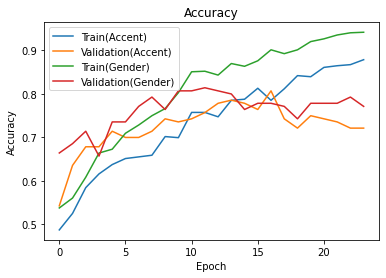

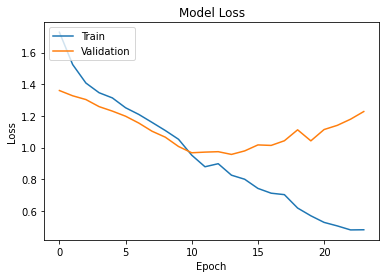

In [44]:
# Plot training and validation accuracy values
plt.plot(history.history['output_accent_accuracy'])
plt.plot(history.history['val_output_accent_accuracy'])
plt.plot(history.history['output_gender_accuracy'])
plt.plot(history.history['val_output_gender_accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train(Accent)','Validation(Accent)', 'Train(Gender)','Validation(Gender)'], loc = 'upper left')
plt.show()

# Plot training and validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc = 'upper left')
plt.show()

In [45]:
accent_prediction, gender_prediction = model_ffn.predict(X_test)
prediction_accent_rounded = [np.argmax(i) for i in accent_prediction]
# prediction_ANN_rounded[0]
y_test_index = [np.argmax(i) for i in y_accent_test]

In [46]:
from sklearn.metrics import classification_report

print(classification_report(y_test_index, prediction_accent_rounded))

              precision    recall  f1-score   support

           0       0.67      0.82      0.74       116
           1       0.77      0.60      0.68       118

    accuracy                           0.71       234
   macro avg       0.72      0.71      0.71       234
weighted avg       0.72      0.71      0.71       234



Text(87.0, 0.5, 'True_value')

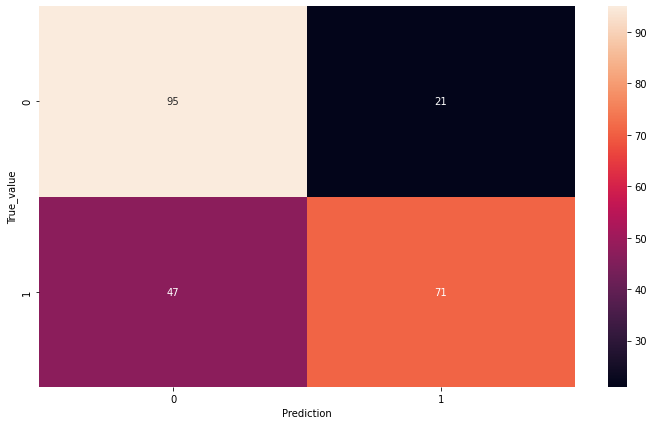

In [47]:
import tensorflow as tf

#Confusion Matrix - verify accuracy of each class
import seaborn as sns
cm = tf.math.confusion_matrix(labels = y_test_index, predictions = prediction_accent_rounded)
plt.figure(figsize = (12,7))
sns.heatmap(cm,annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('True_value')

In [48]:
prediction_gender_rounded = [np.argmax(i) for i in gender_prediction]
# prediction_ANN_rounded[0]
y_test_gender_index = [np.argmax(i) for i in y_gender_test]

Text(87.0, 0.5, 'True_value')

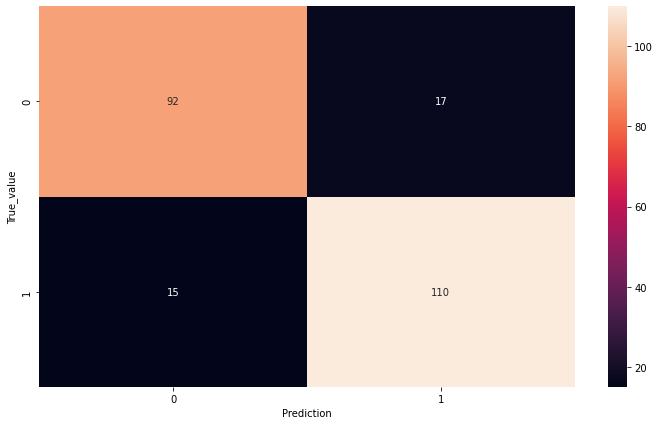

In [49]:
cm = tf.math.confusion_matrix(labels = y_test_gender_index, predictions = prediction_gender_rounded)
plt.figure(figsize = (12,7))
sns.heatmap(cm,annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('True_value')

In [50]:
from sklearn.metrics import classification_report

print(classification_report(y_test_gender_index, prediction_gender_rounded))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       109
           1       0.87      0.88      0.87       125

    accuracy                           0.86       234
   macro avg       0.86      0.86      0.86       234
weighted avg       0.86      0.86      0.86       234



# CNN

### CNN- Accent classification

In [51]:
def create_cnn_model(input_shape=None):
    # Create CNN model
    input_layer = Input(shape=(13, 862, 1), name='Input')
    # conv 1
    conv = Conv2D(32, 3, padding='same', activation='relu')(input_layer)
    batchnorm = BatchNormalization()(conv)
    maxpool = MaxPooling2D(pool_size=(2, 2))(batchnorm)
    batchnorm1 = BatchNormalization()(maxpool)
    # conv 2
    conv1 = Conv2D(32, 3, padding='same', activation='relu')(batchnorm1)
    batchnorm2 = BatchNormalization()(conv1)
    maxpool1 = MaxPooling2D(pool_size=(2, 2))(batchnorm2)
    batchnorm3 = BatchNormalization()(maxpool1)
    # conv 3
    conv2 = Conv2D(128, 3, padding='same', activation='relu', name='conv2')(batchnorm3)
    batchnorm4 = BatchNormalization()(conv2)
    maxpool2 = MaxPooling2D(pool_size=(2, 2))(batchnorm4)
    batchnorm5 = BatchNormalization()(maxpool2)
    # flatten
    flatten = Flatten()(batchnorm5)
    dense = Dense(64, activation='relu',name='Hidden_1')(flatten)
    dropout = Dropout(0.5)(dense)
    # output
    out = Dense(2, activation='sigmoid',name='output')(dropout)
    model = Model(inputs = input_layer ,outputs=out)
    return model


In [52]:
model_cnn_accent = create_cnn_model()

In [53]:
model_cnn_accent.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           [(None, 13, 862, 1)]      0         
_________________________________________________________________
conv2d (Conv2D)              (None, 13, 862, 32)       320       
_________________________________________________________________
batch_normalization (BatchNo (None, 13, 862, 32)       128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 6, 431, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 6, 431, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 6, 431, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 6, 431, 32)        128 

In [54]:
# tf.keras.utils.plot_model(model_cnn_accent, to_file='model.png', show_shapes=True, show_layer_names=False)


In [55]:
model_cnn_accent.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [56]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 35
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath=OUTPUT_DIR +'saved_models/accent_classification_cnn.h5', 
                               verbose=1, save_best_only=True,patience=10, mode='max', monitor='val_accuracy')
early_stopping = EarlyStopping(monitor="val_loss", mode="min", patience=5)

start = datetime.now()

history = model_cnn_accent.fit(X_train, y_accent_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_val, y_accent_val), callbacks=[checkpointer,early_stopping], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/35
25/25 [==============================] - 6s 179ms/step - loss: 1.3210 - accuracy: 0.5922 - val_loss: 0.7731 - val_accuracy: 0.5286

Epoch 00001: val_accuracy improved from -inf to 0.52857, saving model to /kaggle/working/saved_models/accent_classification_cnn.h5
Epoch 2/35
25/25 [==============================] - 4s 168ms/step - loss: 0.6088 - accuracy: 0.8321 - val_loss: 1.3489 - val_accuracy: 0.5286

Epoch 00002: val_accuracy did not improve from 0.52857
Epoch 3/35
25/25 [==============================] - 5s 202ms/step - loss: 0.3130 - accuracy: 0.9205 - val_loss: 1.8311 - val_accuracy: 0.5286

Epoch 00003: val_accuracy did not improve from 0.52857
Epoch 4/35
25/25 [==============================] - 4s 175ms/step - loss: 0.1504 - accuracy: 0.9583 - val_loss: 2.2016 - val_accuracy: 0.5286

Epoch 00004: val_accuracy did not improve from 0.52857
Epoch 5/35
25/25 [==============================] - 4s 170ms/step - loss: 0.0798 - accuracy: 0.9924 - val_loss: 2.0731 - val_accurac

In [57]:
results_accent = model_cnn_accent.evaluate(X_test, y_accent_test)
print(results_accent)

8/8 [==============================] - 0s 36ms/step - loss: 3.0115 - accuracy: 0.5043
[3.0115153789520264, 0.504273533821106]


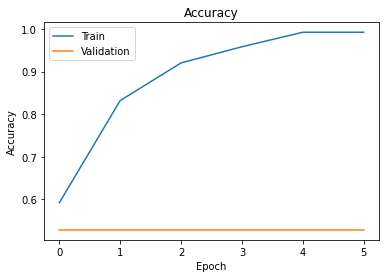

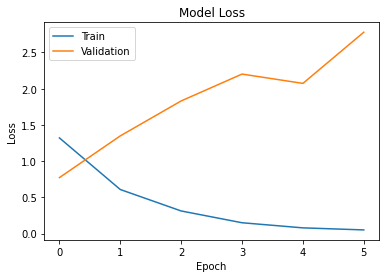

In [58]:
# Plot training and validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc = 'upper left')
plt.show()

# Plot training and validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc = 'upper left')
plt.show()

### CNN - Gender classification

In [59]:
model_cnn_gender = create_cnn_model()

In [60]:
model_cnn_gender.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [61]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 35
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath=OUTPUT_DIR +'saved_models/gender_classification_cnn.h5', 
                               verbose=1, save_best_only=True,patience=5, mode='max', monitor='val_accuracy')
early_stopping = EarlyStopping(monitor="val_loss", mode="min", patience=5)

start = datetime.now()

history_gender = model_cnn_gender.fit(X_train, y_gender_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_val, y_gender_val), callbacks=[checkpointer, early_stopping], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/35
25/25 [==============================] - 5s 180ms/step - loss: 1.0763 - accuracy: 0.6831 - val_loss: 0.7437 - val_accuracy: 0.4857

Epoch 00001: val_accuracy improved from -inf to 0.48571, saving model to /kaggle/working/saved_models/gender_classification_cnn.h5
Epoch 2/35
25/25 [==============================] - 4s 167ms/step - loss: 0.4277 - accuracy: 0.8864 - val_loss: 0.8679 - val_accuracy: 0.4857

Epoch 00002: val_accuracy did not improve from 0.48571
Epoch 3/35
25/25 [==============================] - 5s 199ms/step - loss: 0.2277 - accuracy: 0.9482 - val_loss: 0.7292 - val_accuracy: 0.4929

Epoch 00003: val_accuracy improved from 0.48571 to 0.49286, saving model to /kaggle/working/saved_models/gender_classification_cnn.h5
Epoch 4/35
25/25 [==============================] - 4s 173ms/step - loss: 0.0984 - accuracy: 0.9811 - val_loss: 1.3041 - val_accuracy: 0.4857

Epoch 00004: val_accuracy did not improve from 0.49286
Epoch 5/35
25/25 [==============================] - 4

In [62]:
results_gender = model_cnn_gender.evaluate(X_test, y_gender_test)
print(results_gender)

8/8 [==============================] - 0s 35ms/step - loss: 0.3275 - accuracy: 0.9188
[0.3274613618850708, 0.9188033938407898]


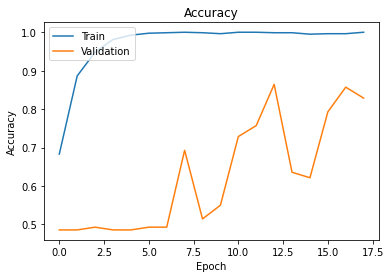

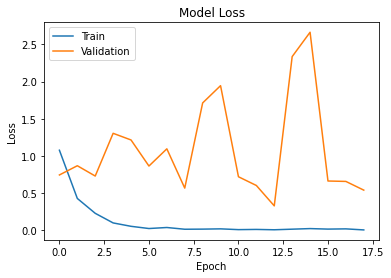

In [63]:
# Plot training and validation accuracy values
plt.plot(history_gender.history['accuracy'])
plt.plot(history_gender.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc = 'upper left')
plt.show()

# Plot training and validation accuracy values
plt.plot(history_gender.history['loss'])
plt.plot(history_gender.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc = 'upper left')
plt.show()

### Multi-task Learning using ConvNets: Accent and Gender

In [64]:
def create_multitask_cnn():
    # Create CNN model
    input_layer = Input(shape=(13, 862,1), name='Input')
    # conv 1
    conv = Conv2D(32, 3, padding='same', activation='relu')(input_layer)
    batchnorm = BatchNormalization()(conv)
    maxpool = MaxPooling2D(pool_size=(2, 2))(batchnorm)
    batchnorm1 = BatchNormalization()(maxpool)
    # conv 2
    conv1 = Conv2D(32, 3, padding='same', activation='relu')(batchnorm1)
    batchnorm2 = BatchNormalization()(conv1)
    maxpool1 = MaxPooling2D(pool_size=(2, 2))(batchnorm1)
    batchnorm3 = BatchNormalization()(maxpool1)
    # conv 3
    conv2 = Conv2D(128, 3, padding='same', activation='relu')(batchnorm3)
    batchnorm4 = BatchNormalization()(conv2)
    maxpool2 = MaxPooling2D(pool_size=(2, 2))(batchnorm4)
    batchnorm5 = BatchNormalization()(maxpool2)
    # flatten
    flatten = Flatten()(batchnorm5)
    dense = Dense(64, activation='relu',name='Hidden_1')(flatten)
    dropout = Dropout(0.5)(dense)
    # output
    out_accent = Dense(2, activation='sigmoid',name='output_accent')(dropout)
    out_gender = Dense(2, activation='sigmoid',name='output_gender')(dropout)

    model_cnn = Model(inputs = input_layer ,outputs=[out_accent, out_gender])
    return model_cnn

In [65]:
multitask_cnn = create_multitask_cnn()
multitask_cnn.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input (InputLayer)              [(None, 13, 862, 1)] 0                                            
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 13, 862, 32)  320         Input[0][0]                      
__________________________________________________________________________________________________
batch_normalization_12 (BatchNo (None, 13, 862, 32)  128         conv2d_4[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_6 (MaxPooling2D)  (None, 6, 431, 32)   0           batch_normalization_12[0][0]     
____________________________________________________________________________________________

In [66]:
multitask_cnn.compile(optimizer='Adam',loss={'output_accent':'binary_crossentropy','output_gender': 'binary_crossentropy'}, metrics ={'output_accent': 'accuracy', 'output_gender': 'accuracy'})

In [67]:
## Training my model

num_epochs = 35
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath=OUTPUT_DIR + 'saved_models/multitask_classification_cnn.h5', 
                               verbose=1, save_best_only=True,patience=10, monitor='val_loss', mode='min')
early_stopping = EarlyStopping(monitor="val_loss", mode="min", patience=10)

start = datetime.now()

history_multitask_cnn = multitask_cnn.fit(X_train, {"output_accent": y_accent_train, "output_gender": y_gender_train},validation_data=(X_val,{"output_accent": y_accent_val, "output_gender": y_gender_val}),
                        batch_size=num_batch_size, epochs=num_epochs, callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/35
25/25 [==============================] - 5s 133ms/step - loss: 2.5778 - output_accent_loss: 1.3037 - output_gender_loss: 1.2741 - output_accent_accuracy: 0.5770 - output_gender_accuracy: 0.6061 - val_loss: 1.3957 - val_output_accent_loss: 0.6839 - val_output_gender_loss: 0.7118 - val_output_accent_accuracy: 0.5571 - val_output_gender_accuracy: 0.5143

Epoch 00001: val_loss improved from inf to 1.39571, saving model to /kaggle/working/saved_models/multitask_classification_cnn.h5
Epoch 2/35
25/25 [==============================] - 3s 118ms/step - loss: 1.4356 - output_accent_loss: 0.8228 - output_gender_loss: 0.6127 - output_accent_accuracy: 0.7677 - output_gender_accuracy: 0.8422 - val_loss: 1.3963 - val_output_accent_loss: 0.6999 - val_output_gender_loss: 0.6965 - val_output_accent_accuracy: 0.5071 - val_output_gender_accuracy: 0.5143

Epoch 00002: val_loss did not improve from 1.39571
Epoch 3/35
25/25 [==============================] - 3s 121ms/step - loss: 0.9265 - output_

In [68]:
results_multitask_cnn = multitask_cnn.evaluate(X_test, {"output_accent": y_accent_test, "output_gender": y_gender_test})
print(results_multitask_cnn)

8/8 [==============================] - 0s 25ms/step - loss: 1.6784 - output_accent_loss: 1.2285 - output_gender_loss: 0.4498 - output_accent_accuracy: 0.7094 - output_gender_accuracy: 0.8803
[1.67836332321167, 1.2285408973693848, 0.4498225152492523, 0.7094017267227173, 0.8803418874740601]


In [69]:
accent_prediction, gender_prediction = multitask_cnn.predict(X_test)
prediction_accent_rounded = [np.argmax(i) for i in accent_prediction]
# prediction_ANN_rounded[0]
y_test_index = [np.argmax(i) for i in y_accent_test]

Text(87.0, 0.5, 'True_value')

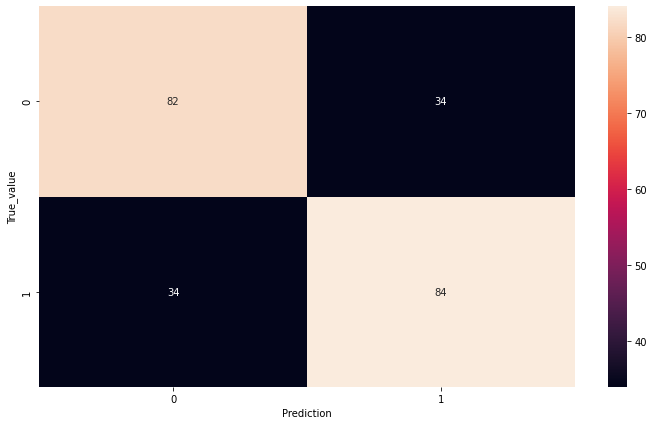

In [70]:
import tensorflow as tf

#Confusion Matrix - verify accuracy of each class
import seaborn as sns
cm = tf.math.confusion_matrix(labels = y_test_index, predictions = prediction_accent_rounded)
plt.figure(figsize = (12,7))
sns.heatmap(cm,annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('True_value')

Text(87.0, 0.5, 'True_value')

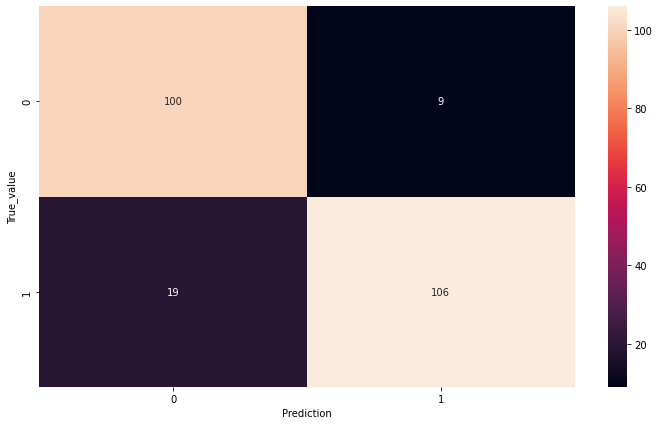

In [71]:
prediction_gender_rounded = [np.argmax(i) for i in gender_prediction]
# prediction_ANN_rounded[0]
y_test_gender_index = [np.argmax(i) for i in y_gender_test]
cm = tf.math.confusion_matrix(labels = y_test_gender_index, predictions = prediction_gender_rounded)
plt.figure(figsize = (12,7))
sns.heatmap(cm,annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('True_value')

In [72]:
from sklearn.metrics import classification_report

print(classification_report(y_test_gender_index, prediction_gender_rounded))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       109
           1       0.92      0.85      0.88       125

    accuracy                           0.88       234
   macro avg       0.88      0.88      0.88       234
weighted avg       0.88      0.88      0.88       234



In [73]:
print(classification_report(y_test_index, prediction_accent_rounded))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71       116
           1       0.71      0.71      0.71       118

    accuracy                           0.71       234
   macro avg       0.71      0.71      0.71       234
weighted avg       0.71      0.71      0.71       234



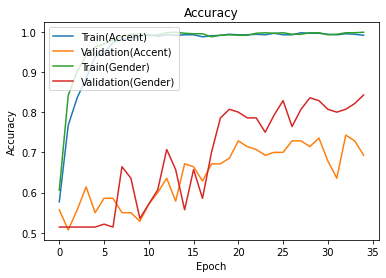

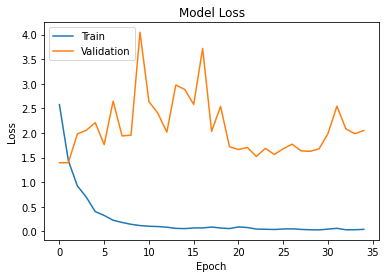

In [74]:
# Plot training and validation accuracy values
plt.plot(history_multitask_cnn.history['output_accent_accuracy'])
plt.plot(history_multitask_cnn.history['val_output_accent_accuracy'])
plt.plot(history_multitask_cnn.history['output_gender_accuracy'])
plt.plot(history_multitask_cnn.history['val_output_gender_accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train(Accent)','Validation(Accent)', 'Train(Gender)','Validation(Gender)'], loc = 'upper left')
plt.show()

# Plot training and validation accuracy values
plt.plot(history_multitask_cnn.history['loss'])
plt.plot(history_multitask_cnn.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc = 'upper left')
plt.show()

# LSTM

### LSTM - Accent classification

In [75]:
def create_LSTM():
    # Create CNN model
    input_layer = Input(shape=(13, 862), name='Input')
    
    lstm_1 = LSTM(64, return_sequences=True)(input_layer)
    lstm_2 = LSTM(64)(lstm_1)
    dense = Dense(64, activation='relu',name='Hidden_1')(lstm_2)
    
#     lstm_3 = LSTM(64, stateful=False)(lstm_2)
    dropout = Dropout(0.5)(dense)
    # output
    out_accent = Dense(2, activation='sigmoid',name='output_accent')(dropout)
#     out_gender = Dense(2, activation='sigmoid',name='output_gender')(dropout)

    model = Model(inputs = input_layer ,outputs=out_accent)
    return model

In [76]:
accent_lstm = create_LSTM()

In [77]:
accent_lstm.compile(optimizer='Adam',loss='binary_crossentropy', metrics =['accuracy'])

In [78]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 35
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath=OUTPUT_DIR +'saved_models/accent_classification.h5', 
                               verbose=1, save_best_only=True,patience=10, mode='max', monitor='val_accuracy')
early_stopping = EarlyStopping(monitor="val_loss", mode="min", patience=7)

start = datetime.now()

history_accent_lstm = accent_lstm.fit(X_train, y_accent_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_val, y_accent_val), callbacks=[checkpointer, early_stopping], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/35
25/25 [==============================] - 6s 85ms/step - loss: 0.6941 - accuracy: 0.5391 - val_loss: 0.6765 - val_accuracy: 0.5857

Epoch 00001: val_accuracy improved from -inf to 0.58571, saving model to /kaggle/working/saved_models/accent_classification.h5
Epoch 2/35
25/25 [==============================] - 1s 33ms/step - loss: 0.6664 - accuracy: 0.6086 - val_loss: 0.6532 - val_accuracy: 0.6786

Epoch 00002: val_accuracy improved from 0.58571 to 0.67857, saving model to /kaggle/working/saved_models/accent_classification.h5
Epoch 3/35
25/25 [==============================] - 1s 33ms/step - loss: 0.5610 - accuracy: 0.7689 - val_loss: 0.6375 - val_accuracy: 0.6429

Epoch 00003: val_accuracy did not improve from 0.67857
Epoch 4/35
25/25 [==============================] - 1s 33ms/step - loss: 0.3275 - accuracy: 0.8775 - val_loss: 0.7362 - val_accuracy: 0.6429

Epoch 00004: val_accuracy did not improve from 0.67857
Epoch 5/35
25/25 [==============================] - 1s 33ms/step 

In [79]:
results_accent_lstm = accent_lstm.evaluate(X_test, y_accent_test)
print(results_accent_lstm)

8/8 [==============================] - 0s 10ms/step - loss: 1.7127 - accuracy: 0.5769
[1.7127057313919067, 0.5769230723381042]


### LSTM multitask

In [80]:
def create_LSTM_multi():
    # Create CNN model
    input_layer = Input(shape=(13, 862), name='Input')
    
#     lstm_1 = LSTM(64, return_sequences=True)(input_layer)
    lstm_2 = LSTM(100)(input_layer)
    
#     lstm_3 = LSTM(64, stateful=False)(lstm_2)
    dropout = Dropout(0.25)(lstm_2)
    # output
    out_accent = Dense(2, activation='sigmoid',name='output_accent')(dropout)
    out_gender = Dense(2, activation='sigmoid',name='output_gender')(dropout)

    model_cnn = Model(inputs = input_layer ,outputs=[out_accent, out_gender])
    return model_cnn

In [81]:
multitask_lstm = create_LSTM_multi()

In [82]:
multitask_lstm.compile(optimizer='Adam',loss={'output_accent':'binary_crossentropy','output_gender': 'binary_crossentropy'}, metrics ={'output_accent': 'accuracy', 'output_gender': 'accuracy'})

In [83]:
## Training my model

num_epochs = 35
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath=OUTPUT_DIR + 'saved_models/multitask_classification_lstm.h5', 
                               verbose=1, save_best_only=True,patience=10, monitor='val_loss', mode='min')
early_stopping = EarlyStopping(monitor="val_loss", mode="min", patience=10)

start = datetime.now()

history_multitask_lstm = multitask_lstm.fit(X_train, {"output_accent": y_accent_train, "output_gender": y_gender_train},validation_data=(X_val,{"output_accent": y_accent_val, "output_gender": y_gender_val}),
                        batch_size=num_batch_size, epochs=num_epochs, callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/35
25/25 [==============================] - 4s 52ms/step - loss: 1.3847 - output_accent_loss: 0.6986 - output_gender_loss: 0.6861 - output_accent_accuracy: 0.5391 - output_gender_accuracy: 0.5947 - val_loss: 1.3447 - val_output_accent_loss: 0.6698 - val_output_gender_loss: 0.6749 - val_output_accent_accuracy: 0.5357 - val_output_gender_accuracy: 0.5786

Epoch 00001: val_loss improved from inf to 1.34468, saving model to /kaggle/working/saved_models/multitask_classification_lstm.h5
Epoch 2/35
25/25 [==============================] - 1s 26ms/step - loss: 1.1587 - output_accent_loss: 0.5698 - output_gender_loss: 0.5889 - output_accent_accuracy: 0.7588 - output_gender_accuracy: 0.7399 - val_loss: 1.3219 - val_output_accent_loss: 0.6580 - val_output_gender_loss: 0.6640 - val_output_accent_accuracy: 0.5571 - val_output_gender_accuracy: 0.6000

Epoch 00002: val_loss improved from 1.34468 to 1.32195, saving model to /kaggle/working/saved_models/multitask_classification_lstm.h5
Epoch 3/

In [84]:
results_multitask_lstm = multitask_lstm.evaluate(X_test, {"output_accent": y_accent_test, "output_gender": y_gender_test})
print(results_multitask_lstm)

8/8 [==============================] - 0s 9ms/step - loss: 3.6670 - output_accent_loss: 2.0363 - output_gender_loss: 1.6307 - output_accent_accuracy: 0.5684 - output_gender_accuracy: 0.6966
[3.6670353412628174, 2.0363221168518066, 1.6307127475738525, 0.5683760643005371, 0.6965811848640442]


# CRNN

### CRNN - Accent classificaiton

In [85]:
from keras.layers.core import Dense, Permute, Reshape
from keras.layers.wrappers import Bidirectional
def create_CRNN_model(input_shape, config, is_training=True):
    
    model = Sequential()
    
    model.add(Conv2D(32, 3, activation="relu",padding='same', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(32, 3, activation="relu",padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, 3, activation="relu",padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

#     model.add(Conv2D(256, 3, activation="relu",padding='same'))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D(pool_size=(2, 2)))

#     model.add(Conv2D(512, 3, 3, W_regularizer=l2(weight_decay), activation="relu"))
#     model.add(BatchNormalization())
    # model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

#     model.add(Convolution2D(512, 3, 3, W_regularizer=l2(weight_decay), activation="relu"))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

#     model.add(Conv2D(512, 3, 3, W_regularizer=l2(weight_decay), activation="relu"))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    

#     input_layer = Input(shape=(13, 862,1), name='Input')
#     # conv 1
#     conv = Conv2D(32, 3, padding='same', activation='relu')(input_layer)
#     batchnorm = BatchNormalization()(conv)
#     maxpool = MaxPooling2D(pool_size=(2, 2))(batchnorm)
#     batchnorm1 = BatchNormalization()(maxpool)
#     # conv 2
#     conv1 = Conv2D(32, 3, padding='same', activation='relu')(batchnorm1)
#     batchnorm2 = BatchNormalization()(conv1)
#     maxpool1 = MaxPooling2D(pool_size=(2, 2))(batchnorm1)
#     batchnorm3 = BatchNormalization()(maxpool1)
#     # conv 3
#     conv2 = Conv2D(128, 3, padding='same', activation='relu')(batchnorm3)
#     batchnorm4 = BatchNormalization()(conv2)
#     maxpool2 = MaxPooling2D(pool_size=(2, 2))(batchnorm4)
#     batchnorm5 = BatchNormalization()(maxpool2)

    # (bs, y, x, c) --> (bs, x, y, c)
    model.add(Permute((2, 1, 3)))

    # (bs, x, y, c) --> (bs, x, y * c)
    bs, x, y, c = model.layers[-1].output_shape
    model.add(Reshape((x, y*c)))

    model.add(Bidirectional(LSTM(256, return_sequences=False), merge_mode="concat"))
    model.add(Dense(2, activation="sigmoid"))


    return model

In [86]:
crnn_model = create_CRNN_model((13,862,1), config)

In [87]:
crnn_model.compile(optimizer='Adam',loss='binary_crossentropy', metrics =['accuracy'])

In [88]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 35
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath=OUTPUT_DIR +'saved_models/accent_crnn_classification.h5', 
                               verbose=1, save_best_only=True,patience=10, mode='max', monitor='val_accuracy')
early_stopping = EarlyStopping(monitor="val_loss", mode="min", patience=5)

start = datetime.now()

history_accent_lstm = crnn_model.fit(X_train, y_accent_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_val, y_accent_val), callbacks=[checkpointer, early_stopping], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/35
25/25 [==============================] - 21s 669ms/step - loss: 0.6926 - accuracy: 0.5909 - val_loss: 0.6793 - val_accuracy: 0.6643

Epoch 00001: val_accuracy improved from -inf to 0.66429, saving model to /kaggle/working/saved_models/accent_crnn_classification.h5
Epoch 2/35
25/25 [==============================] - 15s 614ms/step - loss: 0.5482 - accuracy: 0.7487 - val_loss: 0.6680 - val_accuracy: 0.6571

Epoch 00002: val_accuracy did not improve from 0.66429
Epoch 3/35
25/25 [==============================] - 16s 624ms/step - loss: 0.4389 - accuracy: 0.8030 - val_loss: 0.6721 - val_accuracy: 0.5714

Epoch 00003: val_accuracy did not improve from 0.66429
Epoch 4/35
25/25 [==============================] - 15s 618ms/step - loss: 0.3291 - accuracy: 0.8674 - val_loss: 0.6723 - val_accuracy: 0.5929

Epoch 00004: val_accuracy did not improve from 0.66429
Epoch 5/35
25/25 [==============================] - 15s 616ms/step - loss: 0.1865 - accuracy: 0.9470 - val_loss: 0.6630 - val_a

In [89]:
from keras.models import load_model
crnn_accent_model = load_model('/kaggle/working/saved_models/accent_crnn_classification.h5')
results_accent_crnn = crnn_accent_model.evaluate(X_test, y_accent_test)
print(results_accent_crnn)

8/8 [==============================] - 2s 137ms/step - loss: 0.6841 - accuracy: 0.6197
[0.6840763688087463, 0.6196581125259399]


### CRNN - Gender Classification 

In [90]:
crnn_model_gender = create_CRNN_model((13,862,1), config)

In [91]:
crnn_model_gender.compile(optimizer='Adam',loss='binary_crossentropy', metrics =['accuracy'])

In [92]:
## Trianing my model

checkpointer = ModelCheckpoint(filepath=OUTPUT_DIR +'saved_models/gender_crnn_classification.h5', 
                               verbose=1, save_best_only=True,patience=10, mode='max', monitor='val_accuracy')
early_stopping = EarlyStopping(monitor="val_loss", mode="min", patience=5)

start = datetime.now()

history_gender_crnn = crnn_model_gender.fit(X_train, y_gender_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_val, y_gender_val), callbacks=[checkpointer, early_stopping], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/35
25/25 [==============================] - 20s 621ms/step - loss: 0.6956 - accuracy: 0.5808 - val_loss: 0.6754 - val_accuracy: 0.6000

Epoch 00001: val_accuracy improved from -inf to 0.60000, saving model to /kaggle/working/saved_models/gender_crnn_classification.h5
Epoch 2/35
25/25 [==============================] - 16s 648ms/step - loss: 0.4572 - accuracy: 0.7980 - val_loss: 0.6784 - val_accuracy: 0.5071

Epoch 00002: val_accuracy did not improve from 0.60000
Epoch 3/35
25/25 [==============================] - 14s 579ms/step - loss: 0.2857 - accuracy: 0.8826 - val_loss: 0.6728 - val_accuracy: 0.5214

Epoch 00003: val_accuracy did not improve from 0.60000
Epoch 4/35
25/25 [==============================] - 16s 631ms/step - loss: 0.1842 - accuracy: 0.9356 - val_loss: 0.6373 - val_accuracy: 0.6357

Epoch 00004: val_accuracy improved from 0.60000 to 0.63571, saving model to /kaggle/working/saved_models/gender_crnn_classification.h5
Epoch 5/35
25/25 [=============================

In [93]:
from keras.models import load_model
crnn_gender_model = load_model('/kaggle/working/saved_models/gender_crnn_classification.h5')
results_agender_crnn = crnn_gender_model.evaluate(X_test, y_gender_test)
print(results_agender_crnn)

8/8 [==============================] - 2s 141ms/step - loss: 0.0872 - accuracy: 0.9658
[0.08716566860675812, 0.9658119678497314]


### Multitask Learning- CRNN

In [94]:
def create_CRNN_multitask_model():
    
#     model = Sequential()
    
#     model.add(Conv2D(64, 3, activation="relu",padding='same', input_shape=input_shape))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D(pool_size=(2, 2)))

#     model.add(Conv2D(128, 3, activation="relu",padding='same'))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D(pool_size=(2, 2)))

#     model.add(Conv2D(128, 3, activation="relu",padding='same'))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D(pool_size=(2, 2)))

#     model.add(Conv2D(256, 3, activation="relu",padding='same'))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D(pool_size=(2, 2)))

#     model.add(Conv2D(512, 3, 3, W_regularizer=l2(weight_decay), activation="relu"))
#     model.add(BatchNormalization())
    # model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

#     model.add(Convolution2D(512, 3, 3, W_regularizer=l2(weight_decay), activation="relu"))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

#     model.add(Conv2D(512, 3, 3, W_regularizer=l2(weight_decay), activation="relu"))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    

    input_layer = Input(shape=(13, 862,1), name='Input')
    # conv 1
    conv = Conv2D(32, 3, padding='same', activation='relu')(input_layer)
    batchnorm = BatchNormalization()(conv)
    maxpool = MaxPooling2D(pool_size=(2, 2))(batchnorm)
    # conv 2
    conv1 = Conv2D(32, 3, padding='same', activation='relu')(maxpool)
    batchnorm2 = BatchNormalization()(conv1)
    maxpool1 = MaxPooling2D(pool_size=(2, 2))(batchnorm2)

    # conv 3
    conv2 = Conv2D(128, 3, padding='same', activation='relu')(maxpool1)
    batchnorm4 = BatchNormalization()(conv2)
    maxpool2 = MaxPooling2D(pool_size=(2, 2))(batchnorm4)
    
    permute = Permute((2, 1, 3))(maxpool2)
    reshaped = Reshape((107, 128))(permute)

    lstm = Bidirectional(LSTM(256, return_sequences=False))(reshaped)
    
    out_accent = Dense(2, activation='sigmoid',name='output_accent')(lstm)
    out_gender = Dense(2, activation='sigmoid',name='output_gender')(lstm)

    # (bs, y, x, c) --> (bs, x, y, c)
#     model.add(Permute((2, 1, 3)))

#     # (bs, x, y, c) --> (bs, x, y * c)
#     bs, x, y, c = model.layers[-1].output_shape
#     model.add(Reshape((x, y*c)))

#     model.add(Bidirectional(LSTM(256, return_sequences=False), merge_mode="concat"))
#     model.add([Dense(2, activation="sigmoid", name='output_accent'),Dense(2, activation="sigmoid", name='output_gender')])
    model = Model(inputs = input_layer ,outputs=[out_accent, out_gender])

    return model

In [95]:
multitask_crnn = create_CRNN_multitask_model()

In [96]:
multitask_crnn.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input (InputLayer)              [(None, 13, 862, 1)] 0                                            
__________________________________________________________________________________________________
conv2d_13 (Conv2D)              (None, 13, 862, 32)  320         Input[0][0]                      
__________________________________________________________________________________________________
batch_normalization_24 (BatchNo (None, 13, 862, 32)  128         conv2d_13[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_15 (MaxPooling2D) (None, 6, 431, 32)   0           batch_normalization_24[0][0]     
____________________________________________________________________________________________

In [97]:
multitask_crnn.compile(optimizer='Adam',loss={'output_accent':'binary_crossentropy','output_gender': 'binary_crossentropy'}, metrics ={'output_accent': 'accuracy', 'output_gender': 'accuracy'})

In [98]:
## Training my model

num_epochs = 35
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath=OUTPUT_DIR + 'saved_models/multitask_classification_crnn.h5', 
                               verbose=1, save_best_only=True,patience=10, monitor='val_loss', mode='min')
early_stopping = EarlyStopping(monitor="val_loss", mode="min", patience=5)

start = datetime.now()

history_multitask_crnn = multitask_crnn.fit(X_train, {"output_accent": y_accent_train, "output_gender": y_gender_train},validation_data=(X_val,{"output_accent": y_accent_val, "output_gender": y_gender_val}),
                        batch_size=num_batch_size, epochs=num_epochs, callbacks=[checkpointer, early_stopping], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/35
25/25 [==============================] - 22s 695ms/step - loss: 1.3422 - output_accent_loss: 0.6768 - output_gender_loss: 0.6654 - output_accent_accuracy: 0.5985 - output_gender_accuracy: 0.6098 - val_loss: 1.3438 - val_output_accent_loss: 0.6750 - val_output_gender_loss: 0.6688 - val_output_accent_accuracy: 0.5357 - val_output_gender_accuracy: 0.6857

Epoch 00001: val_loss improved from inf to 1.34381, saving model to /kaggle/working/saved_models/multitask_classification_crnn.h5
Epoch 2/35
25/25 [==============================] - 16s 623ms/step - loss: 0.9791 - output_accent_loss: 0.5700 - output_gender_loss: 0.4091 - output_accent_accuracy: 0.7096 - output_gender_accuracy: 0.8232 - val_loss: 1.3099 - val_output_accent_loss: 0.6689 - val_output_gender_loss: 0.6410 - val_output_accent_accuracy: 0.5357 - val_output_gender_accuracy: 0.6857

Epoch 00002: val_loss improved from 1.34381 to 1.30989, saving model to /kaggle/working/saved_models/multitask_classification_crnn.h5
Epoc

In [99]:
from keras.models import load_model
crnn_multi_model = load_model('/kaggle/working/saved_models/multitask_classification_crnn.h5')
results_multitask_crnn = crnn_multi_model.evaluate(X_test, {"output_accent": y_accent_test, "output_gender": y_gender_test})
print(results_multitask_crnn)

8/8 [==============================] - 2s 139ms/step - loss: 1.2439 - output_accent_loss: 0.8063 - output_gender_loss: 0.4376 - output_accent_accuracy: 0.5513 - output_gender_accuracy: 0.8590
[1.2439309358596802, 0.8063294291496277, 0.4376015365123749, 0.5512820482254028, 0.8589743375778198]


Text(87.0, 0.5, 'True_value')

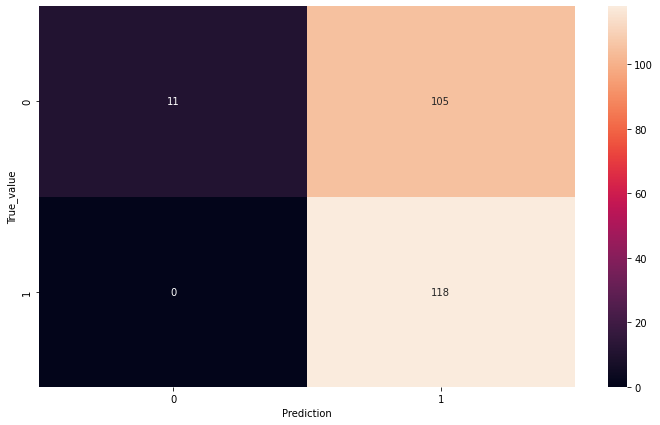

In [100]:
accent_prediction, gender_prediction = crnn_multi_model.predict(X_test)

prediction_accent_rounded = [np.argmax(i) for i in accent_prediction]

# prediction_ANN_rounded[0]

y_test_index = [np.argmax(i) for i in y_accent_test]


import tensorflow as tf


#Confusion Matrix - verify accuracy of each class

import seaborn as sns

cm = tf.math.confusion_matrix(labels = y_test_index, predictions = prediction_accent_rounded)

plt.figure(figsize = (12,7))

sns.heatmap(cm,annot=True, fmt='d')

plt.xlabel('Prediction')

plt.ylabel('True_value')




Text(87.0, 0.5, 'True_value')

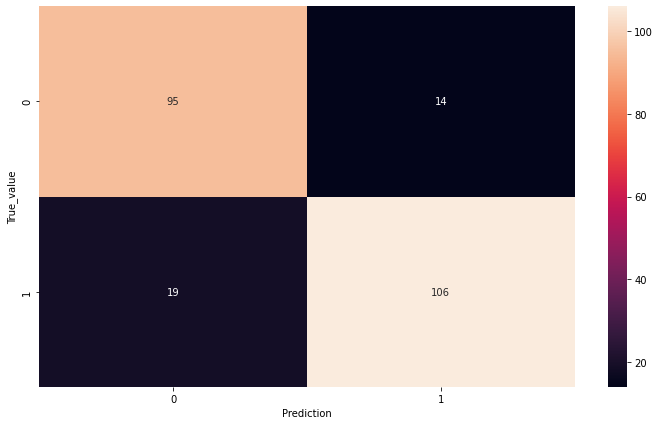

In [101]:
prediction_gender_rounded = [np.argmax(i) for i in gender_prediction]

# prediction_ANN_rounded[0]

y_test_gender_index = [np.argmax(i) for i in y_gender_test]

cm = tf.math.confusion_matrix(labels = y_test_gender_index, predictions = prediction_gender_rounded)

plt.figure(figsize = (12,7))

sns.heatmap(cm,annot=True, fmt='d')

plt.xlabel('Prediction')

plt.ylabel('True_value')

In [102]:
from sklearn.metrics import classification_report

print(classification_report(y_test_gender_index, prediction_gender_rounded))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       109
           1       0.88      0.85      0.87       125

    accuracy                           0.86       234
   macro avg       0.86      0.86      0.86       234
weighted avg       0.86      0.86      0.86       234



In [103]:
from sklearn.metrics import classification_report

print(classification_report(y_test_index, prediction_accent_rounded))

              precision    recall  f1-score   support

           0       1.00      0.09      0.17       116
           1       0.53      1.00      0.69       118

    accuracy                           0.55       234
   macro avg       0.76      0.55      0.43       234
weighted avg       0.76      0.55      0.43       234



# Testing All the models

prepare test samples

In [104]:
test_data = test_data[test_data['file_missing?']==False]

In [105]:
test_data.head()

,age,age_onset,birthplace,filename,native_language,sex,speakerid,country,file_missing?,Unnamed: 9,Unnamed: 10,Unnamed: 11
32,27.0,9.0,"virginia, south africa",afrikaans1,afrikaans,female,1,south africa,False,NaN,NaN,NaN
33,40.0,5.0,"pretoria, south africa",afrikaans2,afrikaans,male,2,south africa,False,NaN,NaN,NaN
34,43.0,4.0,"pretoria, transvaal, south africa",afrikaans3,afrikaans,male,418,south africa,False,NaN,NaN,NaN
35,26.0,8.0,"pretoria, south africa",afrikaans4,afrikaans,male,1159,south africa,False,NaN,NaN,NaN
36,19.0,6.0,"cape town, south africa",afrikaans5,afrikaans,male,1432,south africa,False,NaN,NaN,NaN


In [106]:
test_data['native_language'].value_counts()

turkish     37
german      36
polish      34
italian     33
japanese    27
            ..
konkani      1
kirghiz      1
kanuri       1
kannada      1
zulu         1
Name: native_language, Length: 193, dtype: int64

In [107]:
test_data[test_data['sex']=='female'].head(20)

,age,age_onset,birthplace,filename,native_language,sex,speakerid,country,file_missing?,Unnamed: 9,Unnamed: 10,Unnamed: 11
32,27.0,9.0,"virginia, south africa",afrikaans1,afrikaans,female,1,south africa,False,NaN,NaN,NaN
44,25.0,11.0,"prishtina, kosovo",albanian6,albanian,female,1081,kosovo,False,NaN,NaN,NaN
45,45.0,11.0,"prishtina, kosovo",albanian7,albanian,female,1403,kosovo,False,NaN,NaN,NaN
46,43.0,9.0,"prishtina, kosovo",albanian8,albanian,female,1404,kosovo,False,NaN,NaN,NaN
47,22.0,6.0,"tirana, albania",albanian9,albanian,female,1706,albania,False,NaN,NaN,NaN
50,20.0,5.0,"addis ababa, ethiopia",amharic1,amharic,female,6,ethiopia,False,NaN,NaN,NaN
51,29.0,19.0,"gonder, ethiopia",amharic10,amharic,female,998,ethiopia,False,NaN,NaN,NaN
52,24.0,17.0,"addis ababa, ethiopia",amharic11,amharic,female,1129,ethiopia,False,NaN,NaN,NaN
53,26.0,15.0,"addis ababa, ethiopia",amharic12,amharic,female,1130,ethiopia,False,NaN,NaN,NaN
54,28.0,6.0,"addis ababa, ethiopia",amharic13,amharic,female,1131,ethiopia,False,NaN,NaN,NaN


In [108]:
test_data['filename'] = test_data['filename'].apply(lambda x: x+'.mp3')

In [109]:
f_female_non_native = ['afrikaans1.mp3']

In [110]:
data_path = 'recordings/'
config = Config(sampling_rate=22050, audio_duration=20, learning_rate=0.0001, n_mfcc=13, n_classes=2)
X_female_non_native = prepare_data(f_female_non_native, config, data_path)

  0%|          | 0/1 [00:00<?, ?it/s]

In [111]:
# Play male from Kentucky
fname_m = 'recordings/' + 'afrikaans1.mp3'
ipd.Audio(fname_m)

In [112]:
a=encoder.transform(['female'])
y_female_non_native_gender = to_categorical(np.array(a),  num_classes=2)
print(y_female_non_native_gender)

[[1. 0.]]


In [113]:
encoder1.transform(['non-native'])

array([1])

In [114]:
encoder.transform(['female'])

array([0])

# Label Encoding:
Female - 0
Male  - 1

Native - 0
Non-native - 1

In [115]:
a=encoder1.transform(['non-native'])
y_female_non_native_accent = to_categorical(np.array(a),  num_classes=2)
print(y_female_non_native_accent)

[[0. 1.]]


In [116]:
pred = crnn_multi_model.predict(X_female_non_native)

In [117]:
print("X=%s, Accent Predicted=%s" % (pred[0], y_female_non_native_accent[0]))
print("X=%s, Gender Predicted=%s" % (pred[1], y_female_non_native_gender[0]))

X=[[0.33804464 0.8214103 ]], Accent Predicted=[0. 1.]
X=[[0.74483657 0.36380857]], Gender Predicted=[1. 0.]


In [118]:
from keras.models import load_model
cnn_multi_model = load_model('/kaggle/working/saved_models/multitask_classification_cnn.h5')
pred1 = cnn_multi_model.predict(X_female_non_native)
print("X=%s, Accent Predicted=%s" % (pred1[0], y_female_non_native_accent[0]))
print("X=%s, Gender Predicted=%s" % (pred1[1], y_female_non_native_gender[0]))

X=[[6.2550524e-37 1.0000000e+00]], Accent Predicted=[0. 1.]
X=[[1.0000000e+00 1.4345723e-22]], Gender Predicted=[1. 0.]


African Male accent

In [119]:
f_male_non_native = ['afrikaans4.mp3']
X_male_non_native = prepare_data(f_female_non_native, config, data_path)

  0%|          | 0/1 [00:00<?, ?it/s]

In [120]:
a=encoder.transform(['male'])
y_male_non_native_gender = to_categorical(np.array(a),  num_classes=2)
print(y_male_non_native_gender)

[[0. 1.]]


In [121]:
a=encoder1.transform(['non-native'])
y_male_non_native_accent = to_categorical(np.array(a),  num_classes=2)
print(y_male_non_native_accent)

[[0. 1.]]


In [122]:
from keras.models import load_model
cnn_multi_model = load_model('/kaggle/working/saved_models/multitask_classification_cnn.h5')
pred = cnn_multi_model.predict(X_male_non_native)

In [123]:
print("X=%s, Accent Predicted=%s" % (pred[0], y_male_non_native_accent[0]))
print("X=%s, Gender Predicted=%s" % (pred[1], y_male_non_native_gender[0]))

X=[[5.8369816e-37 1.0000000e+00]], Accent Predicted=[0. 1.]
X=[[1.000000e+00 7.317446e-22]], Gender Predicted=[0. 1.]


In [124]:
pred1 = crnn_multi_model.predict(X_male_non_native)
print("X=%s, Accent Predicted=%s" % (pred1[0], y_male_non_native_accent[0]))
print("X=%s, Gender Predicted=%s" % (pred1[1], y_male_non_native_gender[0]))

X=[[0.3225203  0.84191144]], Accent Predicted=[0. 1.]
X=[[0.8054159 0.2873426]], Gender Predicted=[0. 1.]


English Male

In [125]:
file = '../input/common-voice-samples/English-male.mp3'

In [126]:
X_male_native = prepare_data(['English-male.mp3'], config, '/kaggle/input/common-voice-samples')

  0%|          | 0/1 [00:00<?, ?it/s]

In [127]:
a=encoder.transform(['male'])
y_male_native_gender = to_categorical(np.array(a),  num_classes=2)
print(y_male_native_gender)

[[0. 1.]]


In [128]:
a=encoder1.transform(['native'])
y_male_native_accent = to_categorical(np.array(a),  num_classes=2)
print(y_male_native_accent)

[[1. 0.]]


In [129]:
pred1 = crnn_multi_model.predict(X_male_native)
print("X=%s, Accent Predicted=%s" % (pred1[0], y_male_native_accent[0]))
print("X=%s, Gender Predicted=%s" % (pred1[1], y_male_native_gender[0]))

X=[[0.27027053 0.8536284 ]], Accent Predicted=[1. 0.]
X=[[0.4689849  0.37172842]], Gender Predicted=[0. 1.]


In [130]:
pred1 = cnn_multi_model.predict(X_male_native)
print("X=%s, Accent Predicted=%s" % (pred1[0], y_male_native_accent[0]))
print("X=%s, Gender Predicted=%s" % (pred1[1], y_male_native_gender[0]))

X=[[0. 1.]], Accent Predicted=[1. 0.]
X=[[1. 0.]], Gender Predicted=[0. 1.]


US female

In [131]:
filename = 'kaggle/input/common-voice/cv-other-test/cv-other-test/sample-001204.mp3'

In [132]:
X_female_native = prepare_data(['sample-001204.mp3'], config, '/kaggle/input/common-voice/cv-other-dev/cv-other-dev')

  0%|          | 0/1 [00:00<?, ?it/s]

In [133]:
a=encoder.transform(['female'])
y_female_native_gender = to_categorical(np.array(a),  num_classes=2)
print(y_female_native_gender)
a=encoder1.transform(['native'])
y_female_native_accent = to_categorical(np.array(a),  num_classes=2)
print(y_female_native_accent)

[[1. 0.]]
[[1. 0.]]


In [134]:
pred1 = crnn_multi_model.predict(X_female_native)
print("X=%s, Accent Predicted=%s" % (pred1[0], y_male_native_accent[0]))
print("X=%s, Gender Predicted=%s" % (pred1[1], y_male_native_gender[0]))

pred1 = cnn_multi_model.predict(X_female_native)
print("X=%s, Accent Predicted=%s" % (pred1[0], y_male_native_accent[0]))
print("X=%s, Gender Predicted=%s" % (pred1[1], y_male_native_gender[0]))

X=[[0.32800424 0.8099867 ]], Accent Predicted=[1. 0.]
X=[[0.46202725 0.3491355 ]], Gender Predicted=[0. 1.]
X=[[0. 1.]], Accent Predicted=[1. 0.]
X=[[1. 0.]], Gender Predicted=[0. 1.]


In [135]:
from keras.models import load_model
cnn_accent_model = load_model('/kaggle/working/saved_models/accent_classification_cnn.h5')
cnn_gender_model = load_model('/kaggle/working/saved_models/gender_classification_cnn.h5')
ffn_multi_model = load_model('/kaggle/working/saved_models/audio_classification_ffn.hdf5')
pred1 = cnn_accent_model.predict(X_female_native)
print("Accent Predicted=%s, X=%s" % (pred1[0], y_female_native_accent[0]))
pred1 = cnn_accent_model.predict(X_male_native)
print("Accent Predicted=%s, X=%s" % (pred1[0], y_male_native_accent[0]))
pred1 = cnn_accent_model.predict(X_male_non_native)
print("Accent Predicted=%s, X=%s" % (pred1[0], y_male_non_native_accent[0]))
pred1 = ffn_multi_model.predict(X_female_non_native)
print("Accent Predicted=%s, X=%s" % (pred1[0], y_female_non_native_accent[0]))
pred1 = cnn_gender_model.predict(X_female_native)
print("Accent Predicted=%s, X=%s" % (pred1[0], y_female_native_gender[0]))

Accent Predicted=[1. 1.], X=[1. 0.]
Accent Predicted=[0.99999636 1.        ], X=[1. 0.]
Accent Predicted=[1. 1.], X=[0. 1.]
Accent Predicted=[[5.1051017e-17 8.4423062e-14]], X=[0. 1.]
Accent Predicted=[0. 1.], X=[1. 0.]


In [136]:
from keras.models import load_model
crnn_accent_model = load_model('/kaggle/working/saved_models/accent_crnn_classification.h5')
crnn_gender_model = load_model('/kaggle/working/saved_models/gender_crnn_classification.h5')
pred1 = crnn_accent_model.predict(X_female_native)
print("X=%s, Accent Predicted=%s" % (pred1[0], y_female_native_accent[0]))
pred1 = crnn_gender_model.predict(X_female_native)
print("X=%s, Gender Predicted=%s" % (pred1[0], y_female_native_gender[0]))

X=[0.49748963 0.480636  ], Accent Predicted=[1. 0.]
X=[0.01251   0.9921342], Gender Predicted=[1. 0.]


In [137]:
ffn_multi_model = load_model('/kaggle/working/saved_models/audio_classification_ffn.hdf5')
# Female, Native
pred1 = ffn_multi_model.predict(X_female_native)
print("X=%s, Accent Predicted=%s" % (pred1[0], y_female_native_accent[0]))
print("X=%s, Gender Predicted=%s" % (pred1[1], y_female_native_gender[0]))
# Male, Native
pred1 = ffn_multi_model.predict(X_male_native)
print("X=%s, Accent Predicted=%s" % (pred1[0], y_male_native_accent[0]))
print("X=%s, Gender Predicted=%s" % (pred1[1], y_male_native_gender[0]))
# Male, Non-native
pred1 = ffn_multi_model.predict(X_male_non_native)
print("X=%s, Accent Predicted=%s" % (pred1[0], y_male_non_native_accent[0]))
print("X=%s, Gender Predicted=%s" % (pred1[1], y_male_non_native_gender[0]))

# Female, Non-native
pred1 = ffn_multi_model.predict(X_female_non_native)
print("X=%s, Accent Predicted=%s" % (pred1[0], y_female_non_native_accent[0]))
print("X=%s, Gender Predicted=%s" % (pred1[1], y_female_non_native_gender[0]))

X=[[0. 1.]], Accent Predicted=[1. 0.]
X=[[0. 1.]], Gender Predicted=[1. 0.]
X=[[0. 1.]], Accent Predicted=[1. 0.]
X=[[0. 1.]], Gender Predicted=[0. 1.]
X=[[3.3303133e-14 8.7195599e-16]], Accent Predicted=[0. 1.]
X=[[0. 1.]], Gender Predicted=[0. 1.]
X=[[5.1051017e-17 8.4423062e-14]], Accent Predicted=[0. 1.]
X=[[0. 1.]], Gender Predicted=[1. 0.]


# Multifeature: MFCC + Chroma

In [138]:
def prepare_data_multiple(fnames, config, data_dir):
    X_mfcc = np.empty(shape=(len(fnames), config.dim[0], config.dim[1], 1))
    X_chroma = np.empty(shape=(len(fnames), 12, config.dim[1], 1))
    print(X_chroma.shape)
    input_length = config.audio_length
    for i, fname in tqdm_notebook(enumerate(fnames), total=len(fnames)):
        file_path = os.path.join(data_dir, fname)
        data, _ = librosa.core.load(file_path, sr=config.sampling_rate, res_type="kaiser_fast")

        # Random offset / Padding
        if len(data) > input_length:
            max_offset = len(data) - input_length
            offset = np.random.randint(max_offset)
            data = data[offset:(input_length+offset)]
        else:
            if input_length > len(data):
                max_offset = input_length - len(data)
                offset = np.random.randint(max_offset)
            else:
                offset = 0
            data = np.pad(data, (offset, input_length - len(data) - offset), "constant")

        data_mfcc = librosa.feature.mfcc(data, sr=config.sampling_rate, n_mfcc=config.n_mfcc)
        data_mfcc = np.expand_dims(data_mfcc, axis=-1)
        X_mfcc[i,] = data_mfcc
        data = librosa.feature.chroma_cqt(data, sr=config.sampling_rate)
#         print(data.shape)
        data = np.expand_dims(data, axis=-1)
        X_chroma[i,] = data
    return X_mfcc, X_chroma

In [139]:
X_fnames = np.array(dg['filename'])
data_path = 'recordings/'

config = Config(sampling_rate=22050, audio_duration=20, learning_rate=0.0001, n_mfcc=12, n_classes=2)
feature_file_path = OUTPUT_DIR+'mfcc_features.npy'

X_mfcc, X_chroma = prepare_data_multiple(X_fnames, config, data_path)

(1166, 12, 862, 1)


  0%|          | 0/1166 [00:00<?, ?it/s]

In [140]:
from sklearn.model_selection import train_test_split
X_train_mfcc, X_test_mfcc, y_gender_train, y_gender_test, y_accent_train, y_accent_test = train_test_split(X_mfcc, y_gender, y_accent, test_size=0.2, random_state=10)
print ('Train set:', X_train_mfcc.shape,  y_gender_train.shape)
print ('Test set:', X_test_mfcc.shape,  y_gender_test.shape)
X_train_chroma, X_test_chroma, _, _, _, _ = train_test_split(X_chroma, y_gender, y_accent, test_size=0.2, random_state=10)

X_train_mfcc, X_val_mfcc, _, _, _, _ = train_test_split(X_train_mfcc, y_gender_train, y_accent_train, test_size=0.15, random_state=10)
X_train_chroma, X_val_chroma, y_gender_train, y_gender_val, y_accent_train, y_accent_val = train_test_split(X_train_chroma, y_gender_train, y_accent_train, test_size=0.15, random_state=10)

mean = np.mean(X_train_mfcc, axis=0)
std = np.std(X_train_mfcc, axis=0)

X_train_mfcc = (X_train_mfcc - mean)/std
X_val_mfcc = (X_val_mfcc - mean)/std
X_test_mfcc = (X_test_mfcc - mean)/std

mean = np.mean(X_train_chroma, axis=0)
std = np.std(X_train_chroma, axis=0)

X_train_chroma = (X_train_chroma - mean)/std
X_val_chroma= (X_val_chroma - mean)/std
X_test_chroma = (X_test_chroma - mean)/std

Train set: (932, 12, 862, 1) (932, 2)
Test set: (234, 12, 862, 1) (234, 2)


In [141]:
X_train_chroma.shape

(792, 12, 862, 1)

In [142]:
X_train_mfcc.shape

(792, 12, 862, 1)

In [143]:
def create_CRNN_multi_model(input_shape, is_training=True):
    
#     model = Sequential()
    
#     model.add(Conv2D(64, 3, activation="relu",padding='same', input_shape=input_shape))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D(pool_size=(2, 2)))

#     model.add(Conv2D(128, 3, activation="relu",padding='same'))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D(pool_size=(2, 2)))

#     model.add(Conv2D(128, 3, activation="relu",padding='same'))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D(pool_size=(2, 2)))

#     model.add(Conv2D(256, 3, activation="relu",padding='same'))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D(pool_size=(2, 2)))

#     model.add(Conv2D(512, 3, 3, W_regularizer=l2(weight_decay), activation="relu"))
#     model.add(BatchNormalization())
    # model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

#     model.add(Convolution2D(512, 3, 3, W_regularizer=l2(weight_decay), activation="relu"))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

#     model.add(Conv2D(512, 3, 3, W_regularizer=l2(weight_decay), activation="relu"))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    

    input_layer_mfcc = Input(shape=(12, 862,1), name='Input')
    input_layer_chroma = Input(shape=(12, 862,1), name='Input2')

    # conv 1
    conv_mfcc = Conv2D(32, 3, padding='same', activation='relu')(input_layer_mfcc)
    batchnorm_mfcc = BatchNormalization()(conv_mfcc)
    maxpool_mfcc = MaxPooling2D(pool_size=(2, 2))(batchnorm_mfcc)
    # conv 2
    conv1_mfcc = Conv2D(32, 3, padding='same', activation='relu')(maxpool_mfcc)
    batchnorm2_mfcc = BatchNormalization()(conv1_mfcc)
    maxpool1_mfcc = MaxPooling2D(pool_size=(2, 2))(batchnorm2_mfcc)

    # conv 3
    conv2_mfcc = Conv2D(32, 3, padding='same', activation='relu')(maxpool1_mfcc)
    batchnorm4_mfcc = BatchNormalization()(conv2_mfcc)
    maxpool2_mfcc = MaxPooling2D(pool_size=(2, 2))(batchnorm4_mfcc)
    
    # conv 1
    conv_chroma = Conv2D(32, 3, padding='same', activation='relu')(input_layer_chroma)
    batchnorm_chroma = BatchNormalization()(conv_chroma)
    maxpool_chroma = MaxPooling2D(pool_size=(2, 2))(batchnorm_chroma)
    # conv 2
    conv1_chroma = Conv2D(32, 3, padding='same', activation='relu')(maxpool_chroma)
    batchnorm2_chroma = BatchNormalization()(conv1_chroma)
    maxpool1_chroma = MaxPooling2D(pool_size=(2, 2))(batchnorm2_chroma)

    # conv 3
    conv2_chroma = Conv2D(32, 3, padding='same', activation='relu')(maxpool1_chroma)
    batchnorm4_chroma = BatchNormalization()(conv2_chroma)
    maxpool2_chroma = MaxPooling2D(pool_size=(2, 2))(batchnorm4_chroma)
    

    
    concat = Concatenate()([maxpool2_mfcc, maxpool2_chroma])
#     concat = Concatenate()([batchnorm5_mfcc, batchnorm5_chroma])
    
    permute = Permute((2, 1, 3))(concat)
    reshaped = Reshape((107, 64))(permute)

    lstm = Bidirectional(LSTM(256, return_sequences=False))(reshaped)
    
    out_accent = Dense(2, activation='sigmoid',name='output_accent')(lstm)
    out_gender = Dense(2, activation='sigmoid',name='output_gender')(lstm)

    # (bs, y, x, c) --> (bs, x, y, c)
#     model.add(Permute((2, 1, 3)))

#     # (bs, x, y, c) --> (bs, x, y * c)
#     bs, x, y, c = model.layers[-1].output_shape
#     model.add(Reshape((x, y*c)))

#     model.add(Bidirectional(LSTM(256, return_sequences=False), merge_mode="concat"))
#     model.add([Dense(2, activation="sigmoid", name='output_accent'),Dense(2, activation="sigmoid", name='output_gender')])
    model = Model(inputs = [input_layer_mfcc, input_layer_chroma] ,outputs=[out_accent, out_gender])

    return model

In [144]:
multitask_crnn_2 = create_CRNN_multi_model((12,862,1))

In [145]:
multitask_crnn_2.summary()

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input (InputLayer)              [(None, 12, 862, 1)] 0                                            
__________________________________________________________________________________________________
Input2 (InputLayer)             [(None, 12, 862, 1)] 0                                            
__________________________________________________________________________________________________
conv2d_16 (Conv2D)              (None, 12, 862, 32)  320         Input[0][0]                      
__________________________________________________________________________________________________
conv2d_19 (Conv2D)              (None, 12, 862, 32)  320         Input2[0][0]                     
____________________________________________________________________________________________

In [146]:
multitask_crnn_2.compile(optimizer='Adam',loss={'output_accent':'binary_crossentropy','output_gender': 'binary_crossentropy'}, metrics ={'output_accent': 'accuracy', 'output_gender': 'accuracy'})

In [147]:
## Training my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 35
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath=OUTPUT_DIR + 'saved_models/multitask_multiinput_classification_crnn.h5', 
                               verbose=1, save_best_only=True,patience=10, monitor='val_loss', mode='min')
early_stopping = EarlyStopping(monitor="val_loss", mode="min", patience=5)

start = datetime.now()

history_multitask_crnn2 = multitask_crnn_2.fit({"Input": X_train_mfcc, "Input2": X_train_chroma}, {"output_accent": y_accent_train, "output_gender": y_gender_train},validation_data=({"Input": X_val_mfcc, "Input2": X_val_chroma},{"output_accent": y_accent_val, "output_gender": y_gender_val}),
                        batch_size=num_batch_size, epochs=num_epochs, callbacks=[checkpointer, early_stopping], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/35
25/25 [==============================] - 25s 790ms/step - loss: 1.1411 - output_accent_loss: 0.6724 - output_gender_loss: 0.4688 - output_accent_accuracy: 0.5972 - output_gender_accuracy: 0.7677 - val_loss: 1.3338 - val_output_accent_loss: 0.6801 - val_output_gender_loss: 0.6536 - val_output_accent_accuracy: 0.5786 - val_output_gender_accuracy: 0.5643

Epoch 00001: val_loss improved from inf to 1.33376, saving model to /kaggle/working/saved_models/multitask_multiinput_classification_crnn.h5
Epoch 2/35
25/25 [==============================] - 19s 752ms/step - loss: 0.8055 - output_accent_loss: 0.5978 - output_gender_loss: 0.2077 - output_accent_accuracy: 0.6818 - output_gender_accuracy: 0.9179 - val_loss: 1.2223 - val_output_accent_loss: 0.6722 - val_output_gender_loss: 0.5500 - val_output_accent_accuracy: 0.5429 - val_output_gender_accuracy: 0.6071

Epoch 00002: val_loss improved from 1.33376 to 1.22226, saving model to /kaggle/working/saved_models/multitask_multiinput_class

In [148]:
from keras.models import load_model
crnn_multi_model = load_model('/kaggle/working/saved_models/multitask_multiinput_classification_crnn.h5')
results_multitask_crnn = crnn_multi_model.evaluate({"Input": X_test_mfcc, "Input2": X_test_chroma}, {"output_accent": y_accent_test, "output_gender": y_gender_test})
print(results_multitask_crnn)

8/8 [==============================] - 2s 142ms/step - loss: 1.2126 - output_accent_loss: 0.6882 - output_gender_loss: 0.5244 - output_accent_accuracy: 0.5085 - output_gender_accuracy: 0.6496
[1.212594985961914, 0.6882420182228088, 0.5243529081344604, 0.5085470080375671, 0.6495726704597473]


FFFN

In [149]:
def ffn_multiinputs():
#     input_layer_mfcc = Input(shape=(12, 862), name='Input')
#     input_layer_chroma = Input(shape=(12, 862), name='Input2')
#     concat = Concatenate()([input_layer_mfcc, input_layer_chroma])

#     dense1=Dense(128, activation='relu',name='Hidden_1')(concat)
#     dropout1 = Dropout(0.5)(dense1)

#     dense2=Dense(256, activation='relu',name='Hidden_2')(dropout1)
#     dropout2 = Dropout(0.5)(dense2)

#     dense3=Dense(128, activation='relu',name='Hidden_3')(dropout2)
#     dropout3 = Dropout(0.5)(dense3)
#     m = tf.keras.layers.Flatten()(dropout3)

#     out_accent = Dense(2, activation='sigmoid',name='output_accent')(m)
#     out_gender = Dense(2, activation='sigmoid',name='output_gender')(m)


#     model_ffn = Model(inputs = [input_layer_mfcc,input_layer_chroma] ,outputs=[out_accent, out_gender])
#     return model_ffn
    input_layer_mfcc = Input(shape=(12, 862), name='Input')
    input_layer_chroma = Input(shape=(12, 862), name='Input2')
    

    dense1=Dense(128, activation='relu',name='Hidden_1')(input_layer_mfcc)
    dropout1 = Dropout(0.5)(dense1)

    dense2=Dense(256, activation='relu',name='Hidden_2')(dropout1)
    dropout2 = Dropout(0.5)(dense2)

    dense3=Dense(128, activation='relu',name='Hidden_3')(dropout2)
    dropout3 = Dropout(0.5)(dense3)
    
    dense1_chroma=Dense(128, activation='relu',name='Hidden_11')(input_layer_chroma)
    dropout1_chroma = Dropout(0.5)(dense1_chroma)

    dense2_chroma=Dense(256, activation='relu',name='Hidden_21')(dropout1_chroma)
    dropout2_chroma = Dropout(0.5)(dense2_chroma)

    dense3_chroma=Dense(128, activation='relu',name='Hidden_31')(dropout2_chroma)
    dropout3_chroma = Dropout(0.5)(dense3_chroma)
    concat = Concatenate()([dropout3, dropout3_chroma])
    m = tf.keras.layers.Flatten()(concat)

    out_accent = Dense(2, activation='sigmoid',name='output_accent')(m)
    out_gender = Dense(2, activation='sigmoid',name='output_gender')(m)


    model_ffn = Model(inputs = [input_layer_mfcc,input_layer_chroma] ,outputs=[out_accent, out_gender])
    return model_ffn

In [150]:
model_ffn = ffn_multiinputs()

In [151]:
model_ffn.summary()

Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input (InputLayer)              [(None, 12, 862)]    0                                            
__________________________________________________________________________________________________
Input2 (InputLayer)             [(None, 12, 862)]    0                                            
__________________________________________________________________________________________________
Hidden_1 (Dense)                (None, 12, 128)      110464      Input[0][0]                      
__________________________________________________________________________________________________
Hidden_11 (Dense)               (None, 12, 128)      110464      Input2[0][0]                     
____________________________________________________________________________________________

In [152]:
model_ffn.compile(optimizer='Adam',loss={'output_accent':'binary_crossentropy','output_gender': 'binary_crossentropy'}, metrics ={'output_accent': 'accuracy', 'output_gender': 'accuracy'})

In [153]:
## Training my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 35
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath=OUTPUT_DIR + 'saved_models/multitask_multiinput_classification_ffn.h5', 
                               verbose=1, save_best_only=True,patience=10, monitor='val_loss', mode='min')
early_stopping = EarlyStopping(monitor="val_loss", mode="min", patience=5)

start = datetime.now()

history_multitask_crnn2 = model_ffn.fit({"Input": X_train_mfcc, "Input2": X_train_chroma}, {"output_accent": y_accent_train, "output_gender": y_gender_train},validation_data=({"Input": X_val_mfcc, "Input2": X_val_chroma},{"output_accent": y_accent_val, "output_gender": y_gender_val}),
                        batch_size=num_batch_size, epochs=num_epochs, callbacks=[checkpointer, early_stopping], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/35
25/25 [==============================] - 3s 40ms/step - loss: 1.7597 - output_accent_loss: 0.8909 - output_gender_loss: 0.8688 - output_accent_accuracy: 0.5404 - output_gender_accuracy: 0.5619 - val_loss: 1.3184 - val_output_accent_loss: 0.6881 - val_output_gender_loss: 0.6303 - val_output_accent_accuracy: 0.5500 - val_output_gender_accuracy: 0.7357

Epoch 00001: val_loss improved from inf to 1.31839, saving model to /kaggle/working/saved_models/multitask_multiinput_classification_ffn.h5
Epoch 2/35
25/25 [==============================] - 1s 22ms/step - loss: 1.4726 - output_accent_loss: 0.8056 - output_gender_loss: 0.6670 - output_accent_accuracy: 0.5568 - output_gender_accuracy: 0.6831 - val_loss: 1.2245 - val_output_accent_loss: 0.6429 - val_output_gender_loss: 0.5817 - val_output_accent_accuracy: 0.6857 - val_output_gender_accuracy: 0.7643

Epoch 00002: val_loss improved from 1.31839 to 1.22453, saving model to /kaggle/working/saved_models/multitask_multiinput_classifica

In [154]:
from keras.models import load_model
crnn_multi_model = load_model('/kaggle/working/saved_models/multitask_multiinput_classification_ffn.h5')
results_multitask_crnn = crnn_multi_model.evaluate({"Input": X_test_mfcc, "Input2": X_test_chroma}, {"output_accent": y_accent_test, "output_gender": y_gender_test})
print(results_multitask_crnn)

8/8 [==============================] - 1s 5ms/step - loss: 1.0859 - output_accent_loss: 0.7351 - output_gender_loss: 0.3509 - output_accent_accuracy: 0.6282 - output_gender_accuracy: 0.8419
[1.0859428644180298, 0.7350780963897705, 0.3508647680282593, 0.6282051205635071, 0.8418803215026855]


### CNN with multi inputs

In [155]:
def create_cnn_model2():
    # Create CNN model
    input_layer_mfcc = Input(shape=(12, 862,1), name='Input')
    input_layer_chroma = Input(shape=(12, 862,1), name='Input2')
    # conv 1
    conv = Conv2D(16, 3, padding='same', activation='relu')(input_layer_mfcc)
    batchnorm = BatchNormalization()(conv)
    maxpool = MaxPooling2D(pool_size=(2, 2))(batchnorm)
    batchnorm1 = BatchNormalization()(maxpool)
    # conv 2
    conv1 = Conv2D(16, 3, padding='same', activation='relu')(batchnorm1)
    batchnorm2 = BatchNormalization()(conv1)
    maxpool1 = MaxPooling2D(pool_size=(2, 2))(batchnorm1)
    batchnorm3 = BatchNormalization()(maxpool1)
    # conv 3
    conv2 = Conv2D(128, 3, padding='same', activation='relu')(batchnorm3)
    batchnorm4 = BatchNormalization()(conv2)
    maxpool2 = MaxPooling2D(pool_size=(2, 2))(batchnorm4)
    batchnorm5 = BatchNormalization()(maxpool2)
    
    conv_chroma = Conv2D(16, 3, padding='same', activation='relu')(input_layer_chroma)
    batchnorm_chroma = BatchNormalization()(conv_chroma)
    maxpool_chroma = MaxPooling2D(pool_size=(2, 2))(batchnorm_chroma)
    batchnorm1_chroma = BatchNormalization()(maxpool_chroma)
    # conv 2
    conv1_chroma = Conv2D(16, 3, padding='same', activation='relu')(batchnorm1_chroma)
    batchnorm2_chroma = BatchNormalization()(conv1_chroma)
    maxpool1_chroma = MaxPooling2D(pool_size=(2, 2))(batchnorm1_chroma)
    batchnorm3_chroma = BatchNormalization()(maxpool1_chroma)
    # conv 3
    conv2_chroma = Conv2D(128, 3, padding='same', activation='relu')(batchnorm3_chroma)
    batchnorm4_chroma = BatchNormalization()(conv2_chroma)
    maxpool2_chroma = MaxPooling2D(pool_size=(2, 2))(batchnorm4_chroma)
    batchnorm5_chroma = BatchNormalization()(maxpool2_chroma)
    
    concat = Concatenate()([batchnorm5, batchnorm5_chroma])
    
    # flatten
    flatten = Flatten()(concat)
#     concat = Concatenate()([input_layer_mfcc, input_layer_chroma])
#     dense = Dense(64, activation='relu',name='Hidden_1')(flatten)
#     dropout = Dropout(0.5)(dense)
    # output
    out_accent = Dense(2, activation='sigmoid',name='output_accent')(flatten)
    out_gender = Dense(2, activation='sigmoid',name='output_gender')(flatten)
    model = Model(inputs = [input_layer_mfcc,input_layer_chroma] ,outputs=[out_accent, out_gender])
    return model

In [156]:
multinput_cnn_multi = create_cnn_model2()

In [157]:
multinput_cnn_multi.compile(optimizer='Adam',loss={'output_accent':'binary_crossentropy','output_gender': 'binary_crossentropy'}, metrics ={'output_accent': 'accuracy', 'output_gender': 'accuracy'})

In [158]:
## Training my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 35
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath=OUTPUT_DIR + 'saved_models/multitask_multiinput_classification_cnn.h5', 
                               verbose=1, save_best_only=True,patience=10, monitor='val_loss', mode='min')
early_stopping = EarlyStopping(monitor="val_loss", mode="min", patience=5)

start = datetime.now()

history_multinput_cnn_multi = multinput_cnn_multi.fit({"Input": X_train_mfcc, "Input2": X_train_chroma}, {"output_accent": y_accent_train, "output_gender": y_gender_train},validation_data=({"Input": X_val_mfcc, "Input2": X_val_chroma},{"output_accent": y_accent_val, "output_gender": y_gender_val}),
                        batch_size=num_batch_size, epochs=num_epochs, callbacks=[checkpointer, early_stopping], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/35
25/25 [==============================] - 5s 143ms/step - loss: 1.6228 - output_accent_loss: 1.1075 - output_gender_loss: 0.5153 - output_accent_accuracy: 0.6288 - output_gender_accuracy: 0.8270 - val_loss: 2.7710 - val_output_accent_loss: 0.6695 - val_output_gender_loss: 2.1015 - val_output_accent_accuracy: 0.5571 - val_output_gender_accuracy: 0.5143

Epoch 00001: val_loss improved from inf to 2.77100, saving model to /kaggle/working/saved_models/multitask_multiinput_classification_cnn.h5
Epoch 2/35
25/25 [==============================] - 3s 122ms/step - loss: 0.3219 - output_accent_loss: 0.2499 - output_gender_loss: 0.0720 - output_accent_accuracy: 0.9205 - output_gender_accuracy: 0.9798 - val_loss: 5.9906 - val_output_accent_loss: 0.6571 - val_output_gender_loss: 5.3335 - val_output_accent_accuracy: 0.5786 - val_output_gender_accuracy: 0.5143

Epoch 00002: val_loss did not improve from 2.77100
Epoch 3/35
25/25 [==============================] - 3s 124ms/step - loss: 0.088

In [159]:
from keras.models import load_model
crnn_multi_model = load_model('/kaggle/working/saved_models/multitask_multiinput_classification_cnn.h5')
results_multitask_crnn = crnn_multi_model.evaluate({"Input": X_test_mfcc, "Input2": X_test_chroma}, {"output_accent": y_accent_test, "output_gender": y_gender_test})
print(results_multitask_crnn)

8/8 [==============================] - 1s 27ms/step - loss: 2.6787 - output_accent_loss: 0.6833 - output_gender_loss: 1.9953 - output_accent_accuracy: 0.5598 - output_gender_accuracy: 0.5342
[2.6786727905273438, 0.6833474040031433, 1.9953256845474243, 0.55982905626297, 0.5341880321502686]


In [160]:
def create_cnn_model2():
    # Create CNN model
#     input_layer_mfcc = Input(shape=(12, 862,1), name='Input')
    input_layer_chroma = Input(shape=(12, 862,1), name='Input2')
#     # conv 1
#     conv = Conv2D(32, 3, padding='same', activation='relu')(input_layer_mfcc)
#     batchnorm = BatchNormalization()(conv)
#     maxpool = MaxPooling2D(pool_size=(2, 2))(batchnorm)
#     batchnorm1 = BatchNormalization()(maxpool)
#     # conv 2
#     conv1 = Conv2D(32, 3, padding='same', activation='relu')(batchnorm1)
#     batchnorm2 = BatchNormalization()(conv1)
#     maxpool1 = MaxPooling2D(pool_size=(2, 2))(batchnorm1)
#     batchnorm3 = BatchNormalization()(maxpool1)
#     # conv 3
#     conv2 = Conv2D(128, 3, padding='same', activation='relu')(batchnorm3)
#     batchnorm4 = BatchNormalization()(conv2)
#     maxpool2 = MaxPooling2D(pool_size=(2, 2))(batchnorm4)
#     batchnorm5 = BatchNormalization()(maxpool2)
    
    conv_chroma = Conv2D(32, 3, padding='same', activation='relu')(input_layer_chroma)
    batchnorm_chroma = BatchNormalization()(conv_chroma)
    maxpool_chroma = MaxPooling2D(pool_size=(2, 2))(batchnorm_chroma)
    batchnorm1_chroma = BatchNormalization()(maxpool_chroma)
    # conv 2
    conv1_chroma = Conv2D(64, 3, padding='same', activation='relu')(batchnorm1_chroma)
    batchnorm2_chroma = BatchNormalization()(conv1_chroma)
    maxpool1_chroma = MaxPooling2D(pool_size=(2, 2))(batchnorm1_chroma)
    batchnorm3_chroma = BatchNormalization()(maxpool1_chroma)
    # conv 3
    conv2_chroma = Conv2D(128, 3, padding='same', activation='relu')(batchnorm3_chroma)
    batchnorm4_chroma = BatchNormalization()(conv2_chroma)
    maxpool2_chroma = MaxPooling2D(pool_size=(2, 2))(batchnorm4_chroma)
    batchnorm5_chroma = BatchNormalization()(maxpool2_chroma)
    
#     concat = Concatenate()([batchnorm5, batchnorm5_chroma])
    
    # flatten
    flatten = Flatten()(batchnorm5_chroma)
#     concat = Concatenate()([input_layer_mfcc, input_layer_chroma])
    dense = Dense(64, activation='relu',name='Hidden_1')(flatten)
    dropout = Dropout(0.5)(dense)
    # output
    out = Dense(2, activation='sigmoid',name='output')(dropout)
    model = Model(inputs = input_layer_chroma ,outputs=out)
    return model

In [161]:
multinput_cnn_accent = create_cnn_model2()

In [162]:
multinput_cnn_accent.compile(optimizer='Adam',loss='binary_crossentropy', metrics =['accuracy'])

In [163]:
## Training my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 35
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath=OUTPUT_DIR + 'saved_models/multitask_multiinput_classification_ffn.h5', 
                               verbose=1, save_best_only=True,patience=10, monitor='val_loss', mode='min')
early_stopping = EarlyStopping(monitor="val_loss", mode="min", patience=5)

start = datetime.now()

history_multitask_crnn2 = multinput_cnn_accent.fit({"Input": X_train_mfcc, "Input2": X_train_chroma}, y_accent_train,validation_data=({"Input": X_val_mfcc, "Input2": X_val_chroma},y_accent_val),batch_size=num_batch_size, epochs=num_epochs, callbacks=[checkpointer, early_stopping], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/35
25/25 [==============================] - 4s 129ms/step - loss: 1.4432 - accuracy: 0.5556 - val_loss: 0.7357 - val_accuracy: 0.4857

Epoch 00001: val_loss improved from inf to 0.73566, saving model to /kaggle/working/saved_models/multitask_multiinput_classification_ffn.h5
Epoch 2/35
25/25 [==============================] - 4s 147ms/step - loss: 0.9006 - accuracy: 0.7588 - val_loss: 0.9650 - val_accuracy: 0.4714

Epoch 00002: val_loss did not improve from 0.73566
Epoch 3/35
25/25 [==============================] - 3s 117ms/step - loss: 0.4597 - accuracy: 0.8775 - val_loss: 1.8413 - val_accuracy: 0.4714

Epoch 00003: val_loss did not improve from 0.73566
Epoch 4/35
25/25 [==============================] - 3s 116ms/step - loss: 0.2974 - accuracy: 0.9242 - val_loss: 1.2839 - val_accuracy: 0.4714

Epoch 00004: val_loss did not improve from 0.73566
Epoch 5/35
25/25 [==============================] - 3s 121ms/step - loss: 0.1375 - accuracy: 0.9785 - val_loss: 1.9635 - val_accuracy: 